# Assignment 1
### PIMA Indians diabetes Dataset

In [2]:
# Importing the necassary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
%matplotlib inline


### Importing the data using pandas

In [3]:
data = pd.read_csv(r'/Users/adityanaik/Desktop/Applied AI/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Looking for missing values and data types in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### From the above we see that there are no missing values and that the data types of all the attributes make sense. Lets now display the statistics of the dataset and see if we can get more information

In [5]:
# Displaying the statistics of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### If we look closely the Glucose, BloodPressure, SkinThickness, BMI, and Insulin attributes have a minimum value of 0 which is not possible in any living human being so the 0 values must represent missing data. Lets visualize the data to get a feel of the number of zero values and the distributions of each attribute.

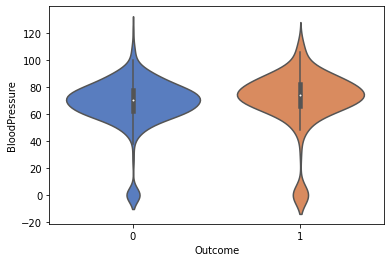

In [6]:
ax1 = sns.violinplot(x = 'Outcome', y = 'BloodPressure', data = data, figsize = (15, 10), palette = 'muted', split = True)


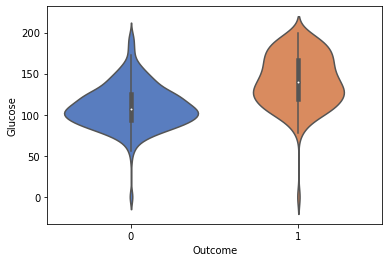

In [7]:
ax2 = sns.violinplot(x = 'Outcome', y = 'Glucose', data = data, figsize = (15, 10), palette = 'muted', split = True)

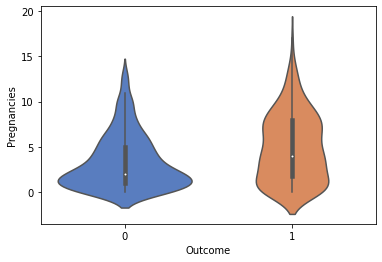

In [8]:
ax2 = sns.violinplot(x = 'Outcome', y = 'Pregnancies', data = data, figsize = (15, 10), palette = 'muted', split = True)

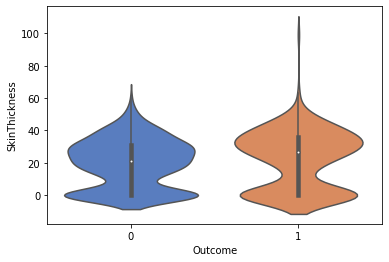

In [9]:
ax2 = sns.violinplot(x = 'Outcome', y = 'SkinThickness', data = data, figsize = (15, 10), palette = 'muted', split = True)

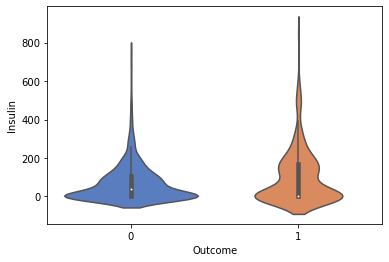

In [10]:
ax2 = sns.violinplot(x = 'Outcome', y = 'Insulin', data = data, figsize = (15, 10), palette = 'muted', split = True)

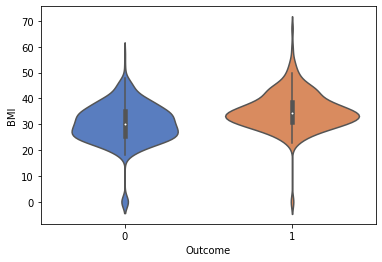

In [11]:
ax2 = sns.violinplot(x = 'Outcome', y = 'BMI', data = data, figsize = (15, 10), palette = 'muted', split = True)

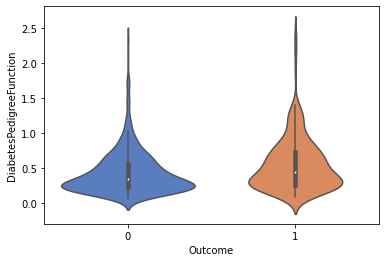

In [12]:
ax2 = sns.violinplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = data, figsize = (15, 10), palette = 'muted', split = True)

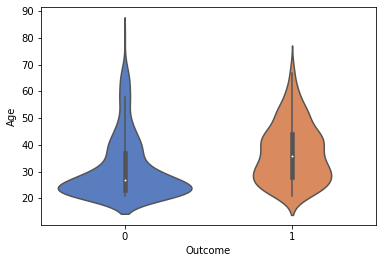

In [13]:
ax2 = sns.violinplot(x = 'Outcome', y = 'Age', data = data, figsize = (15, 10), palette = 'muted', split = True)

#### From the above plots we see that the Pregnancies, Skin thickness and Insulin have a fairly large number of zero values but incase of pregnancies its normal as there can be females who have not undergone pregnancy yet.
#### Other attributes like blood pressure, glucose and BMI have a fairly small number of missing values, while Age, Diabetes pedigree function dont have any missing values. The age variable seems to have been limited to the age of 21 which is understandable under the assumption that diabetes in individuals younger than 21 is very rare.
#### The data for most attributes, except for blood pressure does not seem to follow a normal distribution and hence will require to be centered and scaled

## Dealing with missing values, Strategy: Median
#### Separating the data with outcome 1 and 0 and fitting the missing data with the median of each outcome group respectively.

In [14]:
# Replacing the null values in the dataset with the median values
df1 = data[data['Outcome'] == 1]
df2 = data[data['Outcome'] == 0]

df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))

df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))

df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))

df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))

df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))

dataframe = [df1, df2]
data_clean = pd.concat(dataframe)

In [15]:
# Displaying the clean data
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,27,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [16]:
data_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,91.783854,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,108.121136,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking for correlations among the attributes

In [17]:
#plot color scaled correlation matrix
corr = data_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209155,0.044593,-0.074531,0.023887,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.224684,0.215366,0.309058,0.236225,0.138353,0.268910,0.495990
BloodPressure,0.209155,0.224684,1.000000,0.159653,-0.043125,0.285945,-0.001336,0.325306,0.173316
SkinThickness,0.044593,0.215366,0.159653,1.000000,0.204425,0.573227,0.144541,0.063847,0.282844
Insulin,-0.074531,0.309058,-0.043125,0.204425,1.000000,0.157359,0.165705,-0.033698,0.057946
BMI,0.023887,0.236225,0.285945,0.573227,0.157359,1.000000,0.152779,0.027873,0.315606
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001336,0.144541,0.165705,0.152779,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325306,0.063847,-0.033698,0.027873,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.173316,0.282844,0.057946,0.315606,0.173844,0.238356,1.000000


#### Its clearly visible that the Glucose attribute is very important in the outcome prediction as its correlation coeficient is comparatively high at 0.495 followed by BMI , skin thickness,age, pregnancies, blood pressure, diabetes pedigree function and insulin.
#### Skin thickness seems to have a high correlation of 0.57 with BMI and so we drop skin thickness in order to avoid correlation between attributes. Pregnancies also seems to be higly correlated with the age attribute so we drop this as well in order to prevent the effects of multicolinearity on the machine learning algorithm.
#### Insulin and blood pressure seems to be very loosely correlated to the outcome so we drop that too.

In [197]:
X = data.drop(['Outcome','SkinThickness', 'Insulin', 'Pregnancies', 'BloodPressure'], axis = 1)
y = data['Outcome']

In [198]:
X.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,148,33.6,0.627,50
1,85,26.6,0.351,31
2,183,23.3,0.672,32
3,89,28.1,0.167,21
4,137,43.1,2.288,33


#### We will now scale the data which will be used for the logistic regression and the Knn model only as the decision trees are sensitive to variance and do not need scaling.

In [199]:
# Scaling the data only for some algorithms
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([
                           
                           ('std_scaler', StandardScaler())
])
X_train_norm = numerical_pipe.fit_transform(X)

In [200]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train_norm, y, test_size = 0.2, random_state = 42)

## Building the models

### Logistic Regression

In [76]:
# Plotting the grid search metrics
def plot_search_results(grid, params):
    """
    Parameters: 
        grid: A trained GridSearchCV object.
        params: A dictionary of model attributes as keys and the values as the list of values the parameters 
                take for the grid search 
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    means_train = results['mean_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    
  
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        #print(p)
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[0][p])
        y_1 = np.array(means_test[best_index])
        y_2 = np.array(means_train[best_index])

        plt.title('Mean score per parameter')
        plt.ylabel('Mean accuracy score')
        plt.plot(x, y_1, linestyle='--', marker='o', label='Test')
        plt.plot(x, y_2, linestyle='-', marker='^',label='Train' )
        plt.xlabel(p.upper())
        plt.legend()
        plt.show()

In [77]:
# Using grid search to tune hyper parametrers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression()
param_grid = [
              {'solver' :['liblinear'], 'penalty' : ['l1', 'l2'], 'max_iter': [15,20, 30, 40]},
              {'solver': ['lbfgs'], 'penalty': ['none', 'l2'], 'max_iter': [ 15, 20, 30, 40]}
]

model1_grid_search = GridSearchCV(logistic_model, param_grid, cv = 4,
                                  scoring = 'accuracy',
                                  return_train_score = True)
grid1 = model1_grid_search.fit(X_train, y_train)

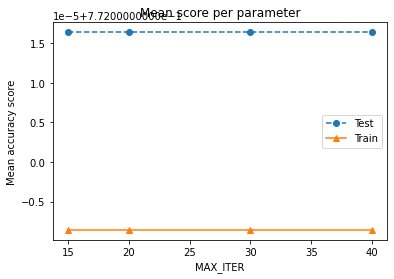

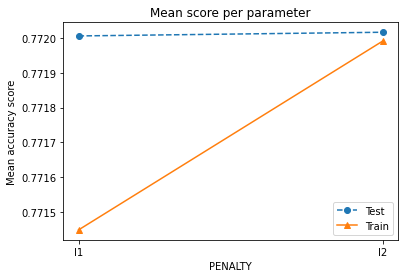

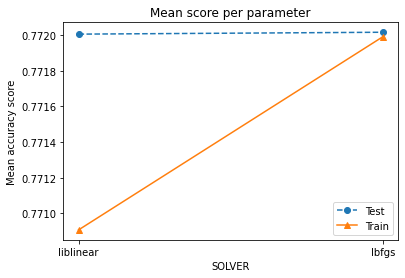

In [80]:
params = [{'solver': ['liblinear', 'lbfgs'], 'penalty': [ 'l1', 'l2'], 'max_iter': [ 15, 20, 30, 40]}]
plot_search_results(grid1, params)
#params = [{'solver': ['lbfgs', 'liblinear'], 'penalty': [ 'none', 'l2'], 'max_iter': [ 15, 20, 30, 40]}]
#plot_search_results(grid1, params)

The above plots were obtained using Grid search cross validation (10 fold) and plots the mean training and validation accuracy scores for the various values of all the attributes in the param_grid dictionary.
The model seems to perform consistently for the values of the max_iteration attribute so we select the lowest value which is 15 iterations.
The solver lbfgs and the l2 regularisation seem to be giving better results with a higher training and validation accuracy compared to the liblinear solver and the l1 regularisation, although the difference in accuracy values is around 0.001 which shows that the model is slightly overfitting with these parameters and so we select the lbfgs solver with l2 regularisation which has a higher training accuracy

### Final parameters selected
##### max_iter = 15
##### penalty = 'l2'
##### solver = 'lbfgs'


In [201]:
# Using logistic regression 

logistic_model = LogisticRegression(max_iter = 15, penalty = 'l2', solver = 'lbfgs')

# Fitting the model to the training data
logistic_model.fit(X_train, y_train)
training_pred = logistic_model.predict(X_train)

training_acc = np.count_nonzero(training_pred == y_train) / len(y_train)
print('Training accuracy: ', training_acc)
average_acc = np.mean(cross_val_score(logistic_model, X_train, y_train, cv = 10, scoring = 'accuracy'))
print('Average validation accuracy: ', average_acc)

# Confusion matrix for training data

y_train_predict = cross_val_predict(logistic_model, X_train, y_train, cv = 10)


print(confusion_matrix(y_train, y_train_predict))
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Training accuracy:  0.7703583061889251
Average validation accuracy:  0.7752247488101534
[[354  47]
 [ 91 122]]
precision score:  0.7218934911242604
recall score:  0.5727699530516432
F1-score:  0.6387434554973823


In [202]:
# Test accuracy
y_test_predictions = logistic_model.predict(X_test)

acc = np.count_nonzero(y_test == y_test_predictions) / len(y_test)
print('Test accuracy: ', acc)

print(confusion_matrix(y_test, y_test_predictions))

precision = precision_score(y_test, y_test_predictions)
recall = recall_score(y_test, y_test_predictions)
f1 = f1_score(y_test, y_test_predictions)
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Test accuracy:  0.7727272727272727
[[84 15]
 [20 35]]
precision score:  0.7
recall score:  0.6363636363636364
F1-score:  0.6666666666666666


## Decision Trees

In [154]:
# Here we select the unscaled data as mentioned before and split it again
X_train_norm = X
X_train, X_test, y_train, y_test = train_test_split(X_train_norm, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier

# Inintializing the model
Decision_tree_model = DecisionTreeClassifier()

# Parameter Dictionary
param_grid = [
              {'criterion' :['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2,4,5,6,7], 'min_samples_split' : [2,3,4,5,6],
               'min_samples_leaf': [1,2,3,4,5], 'max_features': [None, 'auto', 'sqrt', 'log2']}
              
]

# Initializing the grid search object
tree_grid_search = GridSearchCV(Decision_tree_model, param_grid, cv = 10,
                                  scoring = 'accuracy',
                                  return_train_score = True)
# Fitting the data
grid2 = tree_grid_search.fit(X_train, y_train)


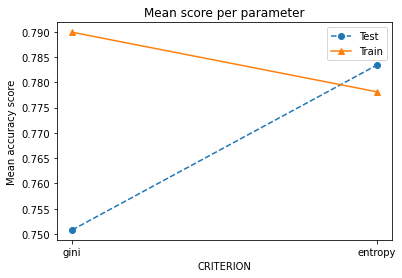

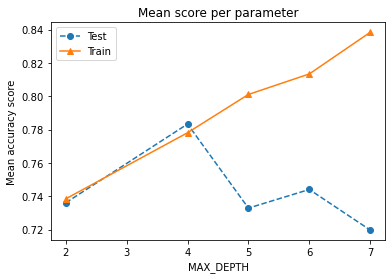

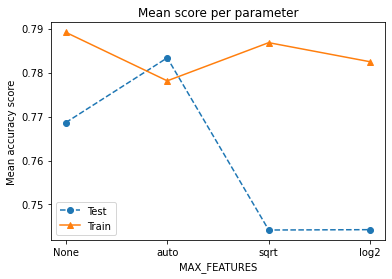

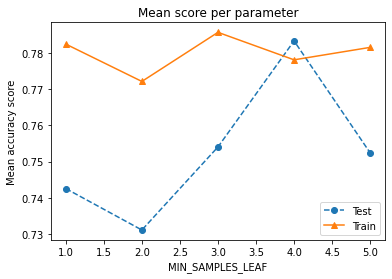

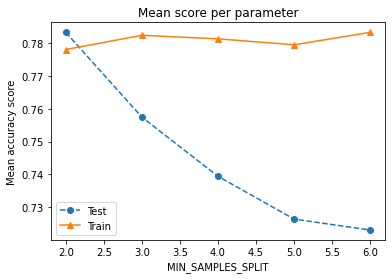

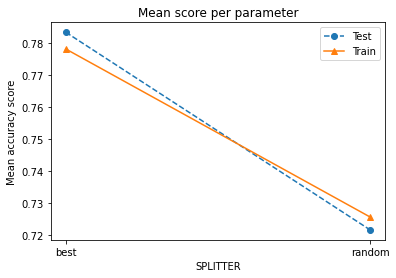

In [155]:
params = [
              {'criterion' :['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2,4,5,6,7], 'min_samples_split' : [2,3,4,5,6],
               'min_samples_leaf': [1,2,3,4,5], 'max_features': ['None', 'auto', 'sqrt', 'log2']}
              
]

plot_search_results(grid2, params)

From the Criterion plot it is clearly visible that the difference between the training and validation accuracies using the gini criterion is greater indicating slight overfitting comapred to the entropy criterion which has a smaller difference. In the max_depth plot the training and validation accuracies seem to parallely increase with depth fo the trr unti the value 4 where the mean validation accuracy drops indicating overfitting and so we select the value 4 for max_depth. The max_features attribute has the optimial training and validation accuracies at auto compared to the others whre the difference is higher. The validation accuracy for min_samples_leaf increases as the number of minimum samples increses up until 4 after which it diverges again indicating overfitting. Min_samples_splits the training and validation accuracies begin diverging from the start value of 2 so we choose 2 as the optimal value and finall the best splitter seems to have a higher training and validation accuracy compared to random.

### Final parameters selected
##### criterion = 'entropy'
##### max_depth = 4
##### max_features = 'auto'
##### min_samples_leaf = 4
##### min_samples_split = 2 
##### splitter = 'best'


In [225]:
# Using Decision Trees
tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 4,
                                   max_features = 'auto',
                                   min_samples_leaf = 4,
                                   min_samples_split = 2,
                                   splitter = 'best')

# Fitting the model to the training data
tree_model.fit(X_train, y_train)
training_pred = tree_model.predict(X_train)

training_acc = np.count_nonzero(training_pred == y_train) / len(y_train)
print('Training accuracy: ', training_acc)

average_acc = np.mean(cross_val_score(tree_model, X_train, y_train, cv = 10, scoring = 'accuracy'))
print('Average validation accuracy: ', average_acc)

# Confusion matrix for training data

y_train_predict = cross_val_predict(tree_model, X_train, y_train, cv = 10)


print(confusion_matrix(y_train, y_train_predict))
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Training accuracy:  0.7833876221498371
Average validation accuracy:  0.7491274457958752
[[338  63]
 [ 94 119]]
precision score:  0.6538461538461539
recall score:  0.5586854460093896
F1-score:  0.6025316455696202


In [226]:
# Test accuracy
y_test_predictions = tree_model.predict(X_test)

acc = np.count_nonzero(y_test == y_test_predictions) / len(y_test)
print('Test accuracy: ', acc)

print(confusion_matrix(y_test, y_test_predictions))

precision = precision_score(y_test, y_test_predictions)
recall = recall_score(y_test, y_test_predictions)
f1 = f1_score(y_test, y_test_predictions)
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Test accuracy:  0.7597402597402597
[[89 10]
 [27 28]]
precision score:  0.7368421052631579
recall score:  0.509090909090909
F1-score:  0.6021505376344085


## K-nn algorithm


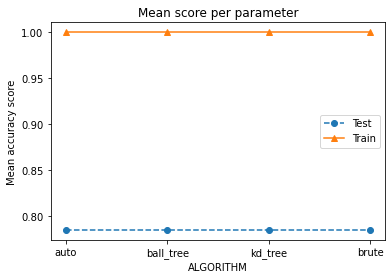

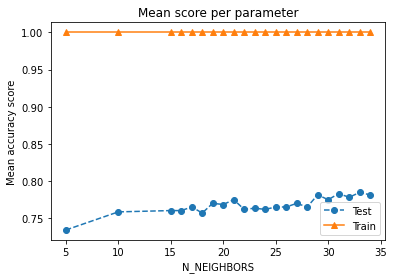

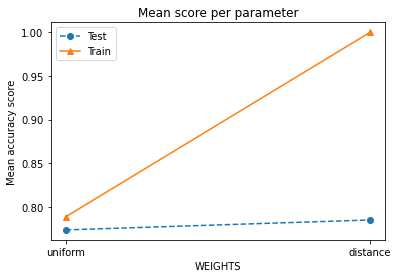

In [234]:
# Scaling the data
X_train_norm = numerical_pipe.fit_transform(X)
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_train_norm, y, test_size = 0.2, random_state = 42)

# Using grid search to tune hyper parametrers
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
param_grid1 = [
             {'n_neighbors': [5, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance']}
]

knn_grid_search = GridSearchCV(knn_model, param_grid1, cv = 10,
                                  scoring = 'accuracy',
                                  return_train_score = True)

grid3 = knn_grid_search.fit(X_train, y_train)


plot_search_results(grid3, param_grid1)

The algorithm plot indicates that all the algorithms perform equally and hence we could choose any, so we will stick to auto. While choosing the number of neighbors we see that we have a training accuracy of 1.0 and the validation accuracy gently rising with the number of neighbors and the difference seems to be the least at n_neighbors  = 33 where the validation accuracy seems to peak and so we select this value. Considering the weights attribute, although the distance seems to have a higher training and validation acuracy the difference between the two is quite high indicating overfitting so we select the uniform attribute for the weights parameter.

#### Final parameters selected
##### algorithm = 'auto' 
##### n_neighbors = 33  
##### weights = 'uniform'

In [240]:
# Using knn

knn_model = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 33 , weights = 'uniform')

# Fitting the model to the training data
knn_model.fit(X_train, y_train)
training_pred = knn_model.predict(X_train)

training_acc = np.count_nonzero(training_pred == y_train) / len(y_train)
print('Training accuracy: ', training_acc)

average_acc = np.mean(cross_val_score(knn_model, X_train, y_train, cv = 10, scoring = 'accuracy'))
print('Average validation accuracy: ', average_acc)

# Confusion matrix for training data

y_train_predict = cross_val_predict(knn_model, X_train, y_train, cv = 10)


print(confusion_matrix(y_train, y_train_predict))
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1 = f1_score(y_train, y_train_predict)
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Training accuracy:  0.7915309446254072
Average validation accuracy:  0.7735589635113695
[[349  52]
 [ 87 126]]
precision score:  0.7078651685393258
recall score:  0.5915492957746479
F1-score:  0.6445012787723786


In [241]:
# Test accuracy
y_test_predictions = knn_model.predict(X_test)

acc = np.count_nonzero(y_test == y_test_predictions) / len(y_test)
print('Test accuracy: ', acc)

print(confusion_matrix(y_test, y_test_predictions))

precision = precision_score(y_test, y_test_predictions)
recall = recall_score(y_test, y_test_predictions)
f1 = f1_score(y_test, y_test_predictions)
print('precision score: ', precision)
print('recall score: ', recall)
print('F1-score: ', f1)

Test accuracy:  0.7597402597402597
[[82 17]
 [20 35]]
precision score:  0.6730769230769231
recall score:  0.6363636363636364
F1-score:  0.6542056074766355


#### By training the above three models we see that the Logistic Regression model produces the best results

## Feature importances

Glucose 0.9633842149903297
BMI 0.7140729866288666
DiabetesPedigreeFunction 0.2062202247601901
Age 0.5102104774343741


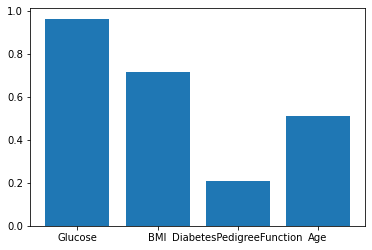

In [248]:
importance = np.squeeze(logistic_model.coef_)
features = list(X.columns)
# summarize feature importance
for i,v in enumerate(importance):
    #print(v)
    print(str(features[i]),v)
# plot feature importance
plt.bar([x for x in features], importance)
plt.show()

We see from the above plot that the Glucose attribute is the most important feature followed by BMI, age and Diabetes Pedigree Function.
So from this we know that we need to monitor the individual's blood gulcose levels regularly and maintain a healthy BMI of between 18.5 to 24.9.
Age and diabetes pedigree function cannot be physically controlled and hence we should focus on maintaining a healthy BMI and blood sugar level.